In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import xarray as xr

plt.rcParams['figure.figsize'] = (15, 7)


In [22]:
run_dir = "../output/stocks_daily/20220424_115006"

In [23]:
dataset = xr.open_dataarray(f"../data/stocks/12_stocks_daily_2022-0421.nc")
train_df = pd.read_csv(f"{run_dir}/train_log.csv")
test_df = pd.read_csv(f"{run_dir}/test_results.csv", parse_dates=['Unnamed: 0']).rename({'Unnamed: 0': 'time'}, axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '../output/stocks_daily/20220424_115006/test_results.csv'

In [ ]:
train_df

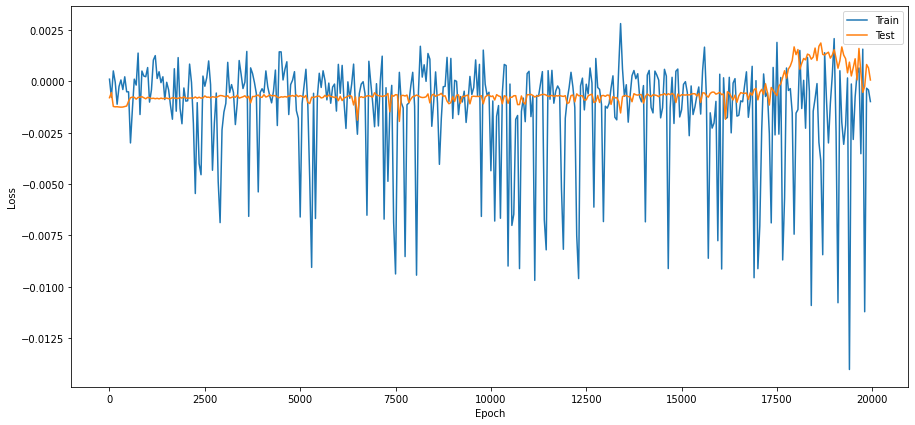

In [19]:
sns.lineplot(x='epoch', y='train_loss', data=train_df)
sns.lineplot(x='epoch', y='test_loss', data=train_df)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(labels=["Train", "Test"])

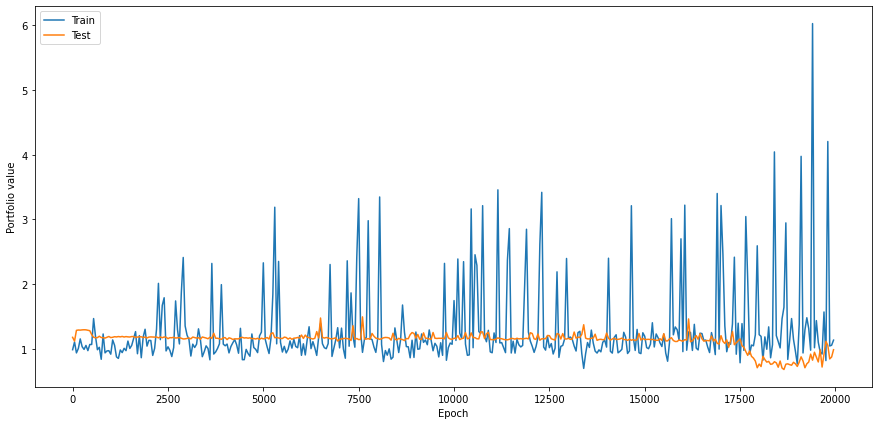

In [12]:
sns.lineplot(x='epoch', y='train_apv', data=train_df)
sns.lineplot(x='epoch', y='test_apv', data=train_df)
plt.ylabel('Portfolio value')
plt.xlabel('Epoch')
plt.legend(labels=["Train", "Test"])

In [134]:
best_epoch = train_df.iloc[np.argmax(train_df['test_apv'])]['epoch']

In [135]:
best_epoch

7601

Text(0, 0.5, 'Part of portfolio')

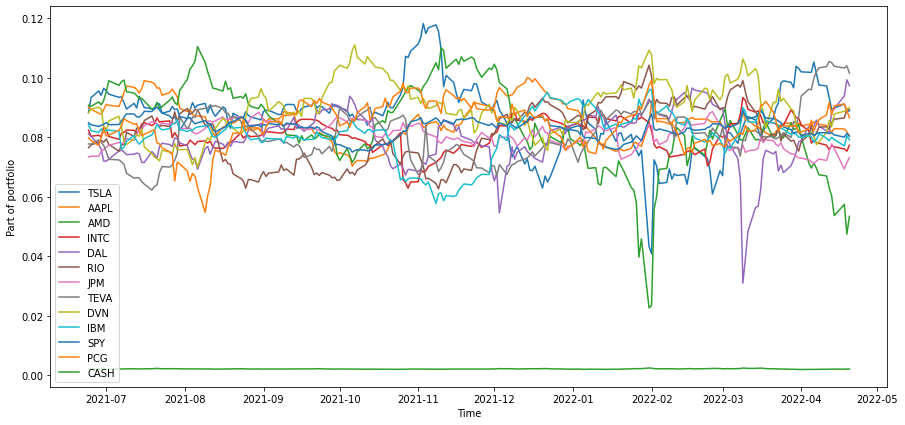

In [136]:
assets = [re.sub(r"^asset_", "", col) for col in test_df.columns if col.startswith('asset_')]
assets = list(filter(lambda asset: asset != "cash", assets)) + ['cash']

for asset in assets:
    sns.lineplot(x='time', y=f'asset_{asset}', data=test_df)
    
plt.legend(labels=[asset.upper() for asset in assets])
plt.xlabel('Time')
plt.ylabel('Part of portfolio')
    

Text(0, 0.5, 'Price change')

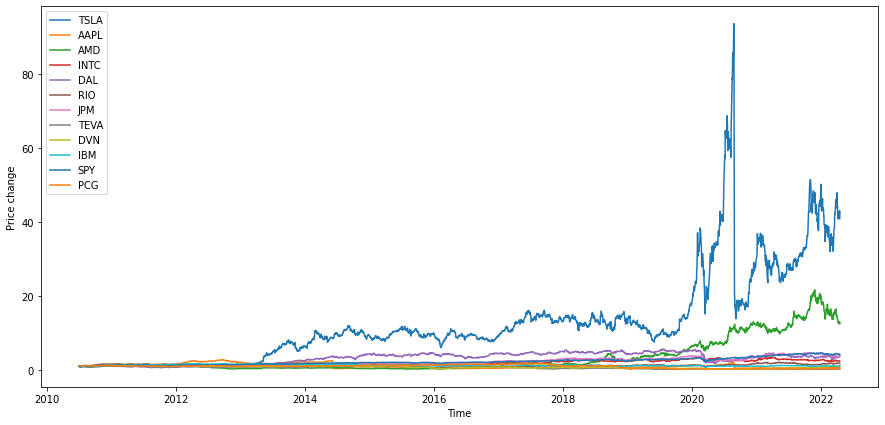

In [137]:
for asset in assets:
    if asset == "cash":
        continue
    asset_data = dataset.sel(coins=asset.upper(), features='close').to_series()
#     asset_data = asset_data[asset_data.index >= test_df['time'][0]]

    sns.lineplot(data=asset_data/asset_data[0])
    
    
plt.legend(labels=[asset.upper() for asset in assets if asset != "cash"])
plt.xlabel('Time')
plt.ylabel('Price change')


Text(0, 0.5, 'Price change')

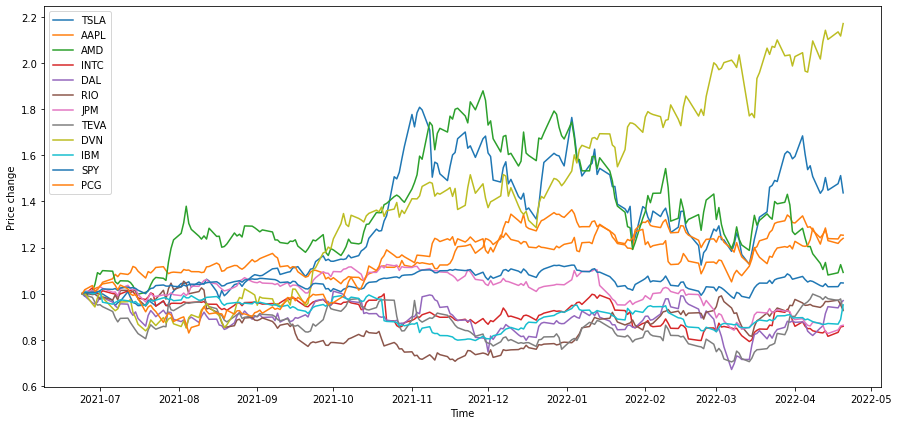

In [138]:
for asset in assets:
    if asset == "cash":
        continue
    asset_data = dataset.sel(coins=asset.upper(), features='close').to_series()
    asset_data = asset_data[asset_data.index >= test_df['time'][0]]

    sns.lineplot(data=asset_data/asset_data[0])
    
    
plt.legend(labels=[asset.upper() for asset in assets if asset != "cash"])
plt.xlabel('Time')
plt.ylabel('Price change')

In [118]:
dataset

<xarray.DataArray (features: 5, coins: 12, time: 2974)>
[178440 values with dtype=float64]
Coordinates:
  * time      (time) datetime64[ns] 2010-06-29 2010-06-30 ... 2022-04-20
  * coins     (coins) object 'TSLA' 'AAPL' 'AMD' 'INTC' ... 'IBM' 'SPY' 'PCG'
  * features  (features) object 'close' 'high' 'low' 'open' 'volume'

<AxesSubplot:xlabel='time', ylabel='Portfolio part'>

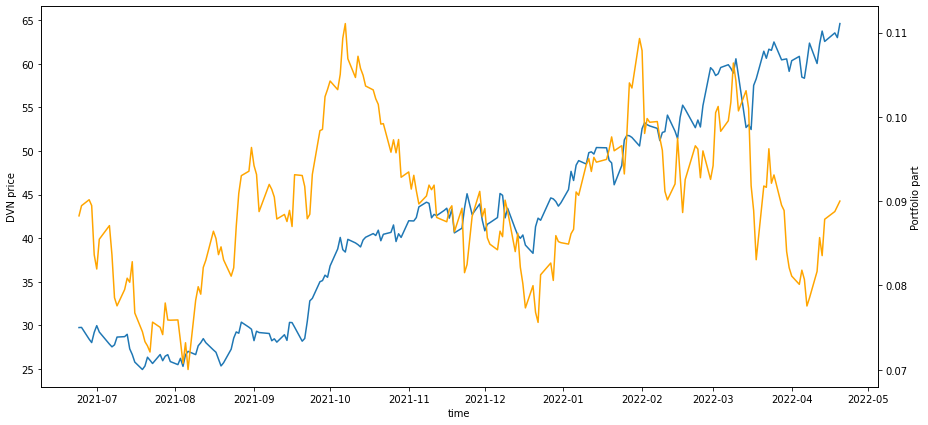

In [123]:
plt.figure(figsize=(15, 7))

asset = 'dvn'

asset_data = dataset.sel(coins=asset.upper(), features='close').to_series()
asset_data = asset_data[asset_data.index >= test_df['time'][0]]

ax = sns.lineplot(data=asset_data)
plt.ylabel(f'{asset.upper()} price')
ax2 = ax.twinx()
plt.ylabel(f'Portfolio part')


sns.lineplot(x='time', y=test_df[f'asset_{asset}'], data=test_df, ax=ax2, color='orange')


<AxesSubplot:xlabel='time', ylabel='Price change'>

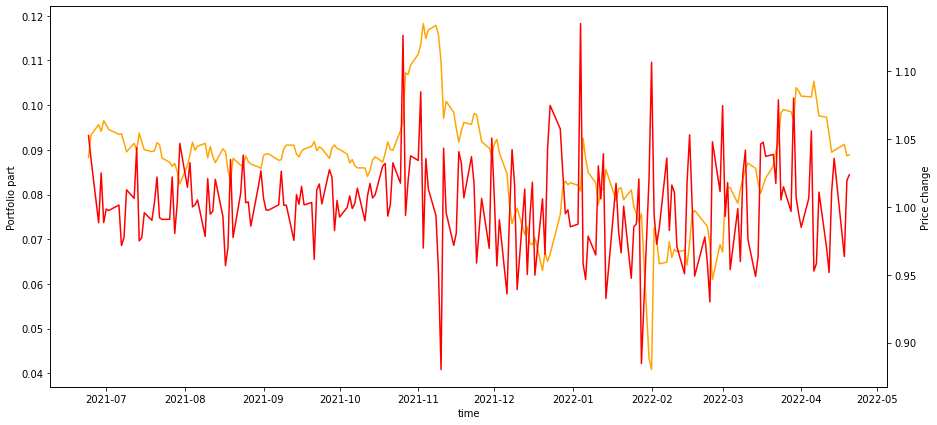

In [91]:
plt.figure(figsize=(15, 7))

ax = sns.lineplot(x='time', y=test_df[f'asset_{asset}'], data=test_df, color='orange')

plt.ylabel(f'Portfolio part')
ax2 = ax.twinx()
plt.ylabel(f'Price change')

sns.lineplot(x='time', y=test_df[f'price_change_{asset}'], data=test_df, ax=ax2, color='red')


<AxesSubplot:title={'center':'Our results vs S&P 500'}, xlabel='time', ylabel='portfolio_value'>

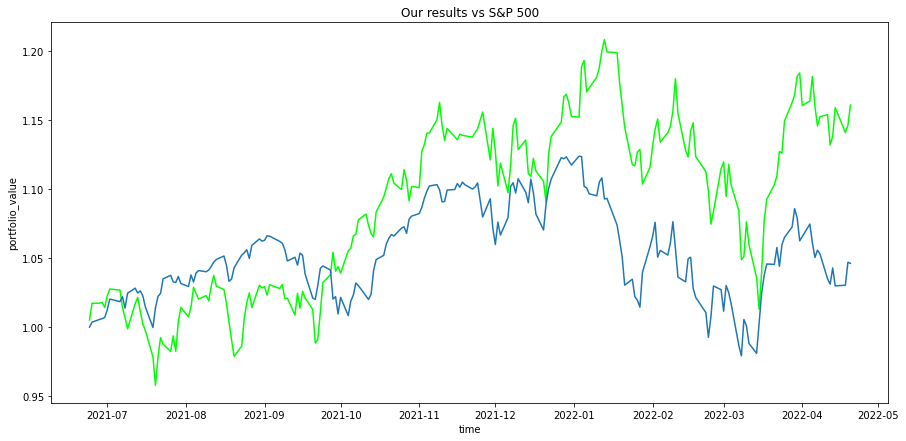

In [98]:
plt.figure(figsize=(15, 7))


asset = 'spy'

asset_data = dataset.sel(coins=asset.upper(), features='close').to_series()
asset_data = asset_data[asset_data.index >= test_df['time'][0]]


plt.title('Our results vs S&P 500')
sns.lineplot(x='time', y='portfolio_value', data=test_df, color='lime')
sns.lineplot(data=asset_data/asset_data[0])
